# **1. Introduction**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.



## **Content**
This data file includes information about the time of transaction, different features of transaction, amount of transaction and if the transaction is legit or not.

## **Acknowledgements**
This public dataset can be found on this [link](https://www.kaggle.com/mlg-ulb/creditcardfraud).

## **Process for this model building**
1. Importing necessary libraries and dataset
2. Getting familiar with the dataset
3. Cleaning the dataset
4. Processing the dataset
5. Splitting the data into Train and Test data
6. Training the model using Train data
7. Checking the accuracy score of the model

# **2. Prepare**

**Information on the Dataset**

* The dataset contains transactions made by credit cards in September 2013 by European cardholders.
* This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

**Limitations of Dataset:**

* Data is only of approximately 2 Days of time period.

**Is Data ROCCC ?**

A good data source is ROCCC which stands for **R**eliable, **O**riginal, **C**omprehensive, **C**urrent, and **C**ited.

* Reliable - LOW - Not reliable as it only has data of 2 Days
* Original - MED - Collected and analysed during a research collaboration of [Worldline and the Machine Learning Group](https://mlg.ulb.ac.be/)
* Comprehensive - LOW - Parameters are hidden to protect the credit card information
* Current - LOW - Data is not known how old this data is and may be not relevant
* Cited - MED - Data collected from Worldline and the Machine Learning Group

Overall, the dataset is considered to be of Good quality data but data is only of 2 Days. Hence, it is not recommended to produce recommendations based on this data.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

**Loading the dataset to a Pandas DataFrame**

In [2]:
credit_card_data = pd.read_csv('../input/creditcardfraud/creditcard.csv')

**First 5 Rows of the dataset**

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Columns Information:**

1. Time: Time of the transaction (Counted in seconds)
2. Amount: Amount of transaction (in US Dollars)
3. V1-V28 : Features of a particular transaction
4. Class: Informs about whether the transaction in legit or not (0: Legit , 1: Fraud)

**Last 5 rows of the dataset**

In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


* **Finding:**

The last entry of time is 172792 seconds which is equal to 2 Days of Dataset.

**Datatype of each column**

In [5]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Datatype looks good. No need to change here anything

# **3: Process**
**Key Objective:**

* Observe and familiarize with data
* Check for null or missing values
* Perform sanity check of data

**Checking the no. of Null Values**

In [6]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

This also looks good. Moving Further.

**Distribution of legit transaction & fraud transaction**

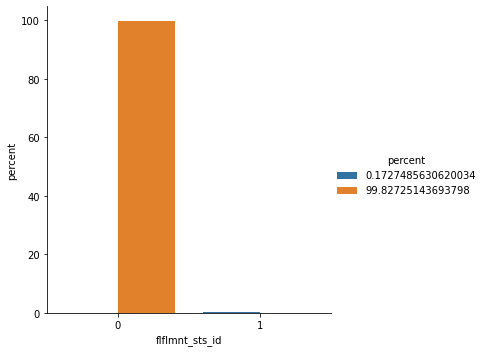

In [7]:
count = credit_card_data['Class'].value_counts(normalize=True).mul(100).reset_index(drop=False)
count.columns = ['flflmnt_sts_id','percent']
(count.pipe((sns.catplot,'data'), x='flflmnt_sts_id',y='percent',hue='percent',kind='bar'))

* **Finding:**

Here, this shows the dataset is very unbalanced because the class of fraud transaction is very less and this can interfere with our machine learning algorithm. Our model may not be able to differentiate between Fraud and Legit trasaction using this dataset. 

One thing that can be done is distributing the Legit and Fraud class trasaction in equal amounts.

**Seperating data for analysis**

In [8]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


**Statistical measures of data**

In [10]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

* **Finding:**

Look at the mean difference of both transaction. Fraud is having a greater mean than legit transaction.

**Compare values for both transaction**

In [12]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Under-Sampling the Dataset**

Build a sample dataset containing similar distribution of normal transaction and Fraud Transaction.

No. of Fraud Transaction - 492

In [13]:
#sample will pick random rows from the legit data

legit_sample = legit.sample(n=492)

**Merging 2 Dataframes**

In [14]:
#making a new dataset which will have same amount of rows of fraud and legit transactions

new_dataset = pd.concat([legit_sample,fraud], axis = 0)

In [15]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
276948,167376.0,0.000883,0.131659,-0.134154,-0.557773,-0.455798,0.881928,-0.721391,0.975757,0.873408,...,0.317558,0.659787,0.341045,-0.332508,-1.160073,0.356185,-0.067366,-0.010981,90.90,0
12862,22597.0,-1.238684,0.036510,2.626052,1.683645,-0.452814,-0.134286,-0.208335,0.248817,1.531816,...,0.076584,0.294218,0.047558,0.296282,0.343450,-0.080493,0.280983,0.164256,115.00,0
11101,19181.0,-0.802037,0.266210,2.658371,-1.910571,0.027894,0.587127,0.140348,0.194926,2.329944,...,-0.050855,0.419235,-0.315112,-0.340323,0.280222,-0.799731,-0.056358,-0.169105,11.85,0
190584,128892.0,2.041347,0.104702,-1.708360,0.438858,0.379927,-0.894991,0.205127,-0.240639,0.495837,...,-0.353103,-0.950459,0.330004,0.567832,-0.269751,0.168037,-0.065979,-0.027381,17.99,0
173734,121619.0,0.301112,0.833446,-0.524646,1.611325,0.444283,-0.828345,0.904254,-0.533959,0.240264,...,0.141394,1.037714,0.006824,0.318497,-1.473396,0.847114,-0.262094,-0.140896,29.56,0


In [16]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [17]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 276948 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64

In [18]:
new_dataset.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

* **Findings:**

Now, this dataset is balanced as the count of Legit and Fraud is equal. Now our model can easily work with this and differentiate between Fraud and Legit transactions.

In [19]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95613.778455,-0.016664,0.057884,0.062485,-0.057757,0.072057,-0.041836,0.021756,-0.035147,-0.034269,...,0.004567,-0.056473,-0.025390,-0.033255,-0.00502,-0.038668,-0.002375,-0.006617,0.009908,84.774675
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


* **Findings:**

We can see that numbers have not changed a lot as this looks almost similar to the previous means.

**Splitting the data into Features and Targets**

In [20]:
X = new_dataset.drop(columns=['Class', 'Time'],axis=1)     # Features
Y = new_dataset['Class']                         #Target

In [21]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
276948,0.000883,0.131659,-0.134154,-0.557773,-0.455798,0.881928,-0.721391,0.975757,0.873408,-1.108300,...,-0.126247,0.317558,0.659787,0.341045,-0.332508,-1.160073,0.356185,-0.067366,-0.010981,90.90
12862,-1.238684,0.036510,2.626052,1.683645,-0.452814,-0.134286,-0.208335,0.248817,1.531816,-0.542665,...,0.468790,0.076584,0.294218,0.047558,0.296282,0.343450,-0.080493,0.280983,0.164256,115.00
11101,-0.802037,0.266210,2.658371,-1.910571,0.027894,0.587127,0.140348,0.194926,2.329944,-1.953244,...,-0.127094,-0.050855,0.419235,-0.315112,-0.340323,0.280222,-0.799731,-0.056358,-0.169105,11.85
190584,2.041347,0.104702,-1.708360,0.438858,0.379927,-0.894991,0.205127,-0.240639,0.495837,-0.384616,...,-0.126498,-0.353103,-0.950459,0.330004,0.567832,-0.269751,0.168037,-0.065979,-0.027381,17.99
173734,0.301112,0.833446,-0.524646,1.611325,0.444283,-0.828345,0.904254,-0.533959,0.240264,-0.008316,...,0.112712,0.141394,1.037714,0.006824,0.318497,-1.473396,0.847114,-0.262094,-0.140896,29.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [22]:
Y

276948    0
12862     0
11101     0
190584    0
173734    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

# **4. Spliting the data into train and test data**

In [23]:
# 20% of the data will be taken for the Testing and 80% of the data will be taken for the Training

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(984, 29) (787, 29) (197, 29)


# **5. Model Training**

### **Using Logistic Regression**

In [25]:
# Defining Logistic Regression into a variable
model = LogisticRegression(solver='liblinear')

**Training the Logistic Regression model with training data**

In [26]:
# Fitting the train dataset into the model for Training
model.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

# **6. Model Evaluation**

### **Accuracy Score**

In [27]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [28]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [29]:
print('Accuracy on Training Data: ',training_data_accuracy)
print('Accuracy on Test Data: ',test_data_accuracy)

Accuracy on Training Data:  0.9466327827191868
Accuracy on Test Data:  0.9289340101522843


**Finding:**

* Accuracy on train dataset is above 90% which is considered fairly good.
* Accuracy on test dataset is above 90% which is considered fairly good.

## **Drawbacks:**

* We loose information by dropping out the data
* Metric of accuracy is not convincing for the imbalanced problem
* Model is not fine tuned

In [30]:
from xgboost import XGBClassifier
params = {
            'objective':'binary:logistic',
            'max_depth': 8,
            'alpha': 10,
            'learning_rate': 0.1,
            'n_estimators':1000
        }         

# instantiate the classifier 
xgb_clf = XGBClassifier(**params)
X = credit_card_data.drop(columns=['Class', 'Time'],axis=1) # Features
Y = credit_card_data['Class'] # Target
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
# fit the classifier to the training data
xgb_clf.fit(X_train, Y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:32:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
# Accuracy on test data
X_test_prediction = xgb_clf.predict(X_test)

In [32]:
classification_report(Y_test, X_test_prediction, output_dict=True)

{'0': {'precision': 0.9997010883899214,
  'recall': 0.9998593134496342,
  'f1-score': 0.9997801946596095,
  'support': 56864},
 '1': {'precision': 0.9101123595505618,
  'recall': 0.826530612244898,
  'f1-score': 0.8663101604278074,
  'support': 98},
 'accuracy': 0.9995611109160493,
 'macro avg': {'precision': 0.9549067239702416,
  'recall': 0.9131949628472661,
  'f1-score': 0.9330451775437085,
  'support': 56962},
 'weighted avg': {'precision': 0.9995469558906016,
  'recall': 0.9995611109160493,
  'f1-score': 0.9995505667786588,
  'support': 56962}}